In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
app_labels=pd.read_csv("data/app_labels.csv")
app_events=pd.read_csv("data/app_events.csv")
events=pd.read_csv("data/events.csv")
gender_age_test=pd.read_csv("data/gender_age_test.csv")
gender_age_train=pd.read_csv("data/gender_age_train.csv")
label_categories=pd.read_csv("data/label_categories.csv")
phone_data=pd.read_csv("data/phone_brand_device_model.csv")


-- 

<h3>Gender,age and group Analysis:<h3>

In [ ]:
gender_age_test.head()

,device_id
0,1002079943728939269
1,-1547860181818787117
2,7374582448058474277
3,-6220210354783429585
4,-5893464122623104785


Text(0, 0.5, 'total people in Group')

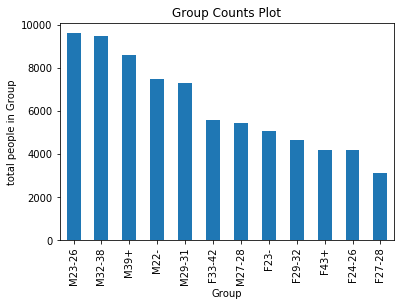

In [ ]:
gender_age_train['group'].value_counts().plot.bar()
plt.title('Group Counts Plot')
plt.xlabel('Group')
plt.ylabel('total people in Group')

<li>There are totally 12 groups,where male users are more than female users</li>
<li>Male age range -> 22-39+</li>
<li>Female age range -> 23-43+</li>
<li>Age wise we have more data in females and count wise male data is more.</li>

percentage of female:35.824234710965236%
percentage of male:64.17576528903477%


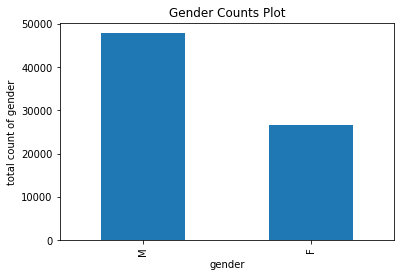

In [ ]:
gender_age_train['gender'].value_counts().plot.bar()
plt.title('Gender Counts Plot')
plt.xlabel('gender')
plt.ylabel('total count of gender')

gender_counts=gender_age_train['gender'].value_counts()
total=gender_counts[0]+gender_counts[1]
print("percentage of female:{0}%".format((gender_counts[1]/total)*100))
print("percentage of male:{0}%".format((gender_counts[0]/total)*100))

/usr/local/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'distPlot-gender vs age')

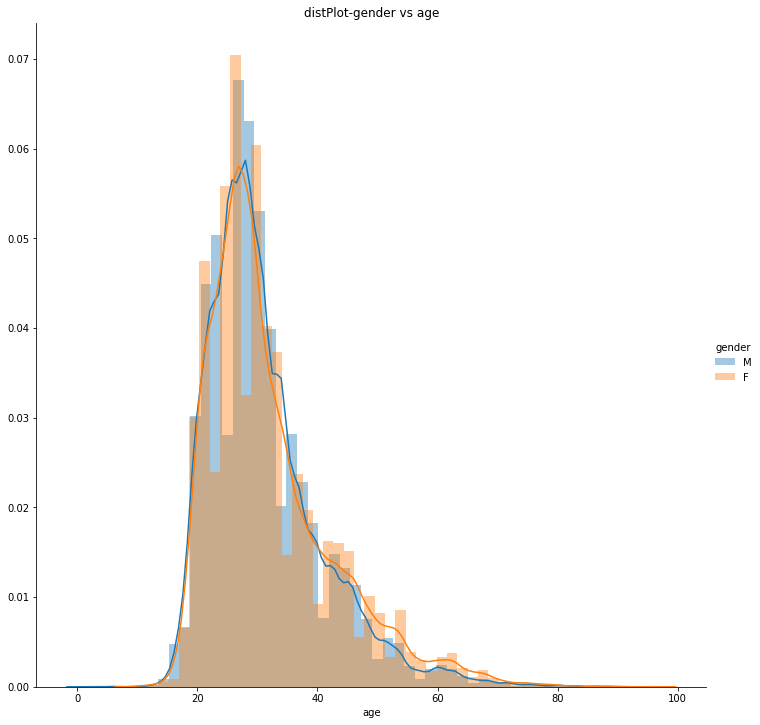

In [ ]:
sns.FacetGrid(gender_age_train,hue="gender", height=10) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.title("distPlot-gender vs age")




Text(0.5, 1.0, 'BoxPlot-Male age')

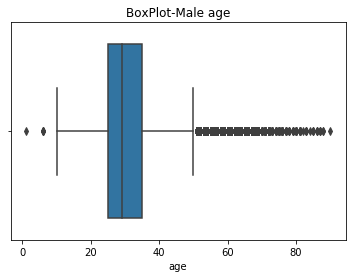

In [ ]:
df=gender_age_train[ (gender_age_train['gender']=='M') ]
sns.boxplot(x='age', data=df)
plt.title("BoxPlot-Male age")




Text(0.5, 1.0, 'BoxPlot-Female age')

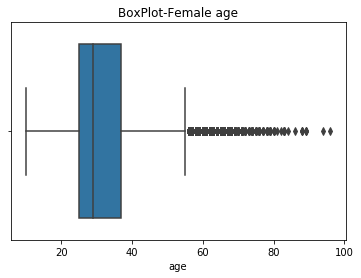

In [ ]:
df=gender_age_train[ (gender_age_train['gender']=='F') ]
sns.boxplot(x='age', data=df)
plt.title("BoxPlot-Female age")


In [ ]:
#Median, Quantiles, Percentiles, IQR.
import numpy as np

df_m=gender_age_train[ (gender_age_train['gender']=='M') ]
df_f=gender_age_train[ (gender_age_train['gender']=='F') ]

print("\nMedians:")
print(np.median(df_m['age']))
print(np.median(df_f['age']))


print("\nQuantiles:")
print(np.percentile(df_m['age'],np.arange(0, 101, 25)))
print(np.percentile(df_f['age'],np.arange(0, 101, 25)))

print("\n90th Percentiles:")
print(np.percentile(df_m['age'],90))
print(np.percentile(df_f['age'],90))

import statsmodels
from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(df_m['age']))
print(robust.mad(df_f['age']))




Medians:
29.0
29.0

Quantiles:
[ 1. 25. 29. 35. 90.]
[10. 25. 29. 37. 96.]

90th Percentiles:
44.0
47.0

Median Absolute Deviation
7.41301109252801
7.41301109252801


<h5>Observation:</h5>
<li>25 and 75 Percentile Age values for Both Male and Female are similar</li>
<li>MAD is same for both Male and female</li>
<li>Evn though the count of male is higher than female ,the distribution of data in both is similar.</li>

In [ ]:
print(gender_age_test.shape)
gender_age_test.head()

(112071, 1)


,device_id
0,1002079943728939269
1,-1547860181818787117
2,7374582448058474277
3,-6220210354783429585
4,-5893464122623104785


<h5>Observation:</h5>
<li>gender_age_test contains only device ids and has 112071 rows of data.</li>

<h3>Event,app events and labels analysis:<h3>

In [ ]:
events['device_id'].shape

(3252950,)

In [ ]:
event_timestamps=events['timestamp'].values
print("Event Start: ",np.min(event_timestamps))
print("Event End: ",np.max(event_timestamps))

Event Start:  2016-04-30 23:52:24
Event End:  2016-05-08 00:00:08


In [ ]:
events['hour']=events['timestamp'].map(lambda x:pd.to_datetime(x).hour)
events['hour']

0           0
1           0
2           0
3           0
4           0
           ..
3252945    23
3252946    23
3252947    23
3252948    23
3252949    23
Name: hour, Length: 3252950, dtype: int64

In [ ]:
events['night_active'] = ["Y" if (x>=23) or (x<=3) else "N" for x in events['hour']] 

'''for i,j in enumerate(events['hour']):
    if (i>23)|(i<3):
        events['night_active'][j]='Y'
    else:
        events['night_active'][j]='N'        
    
'''
events['night_active']

0          Y
1          Y
2          Y
3          Y
4          Y
          ..
3252945    Y
3252946    Y
3252947    Y
3252948    Y
3252949    Y
Name: night_active, Length: 3252950, dtype: object

In [ ]:
events_merged=gender_age_train.merge(events, left_on='device_id', right_on='device_id',how='inner')


Text(0.5, 1.0, 'CountPlot-Status vs nodes')

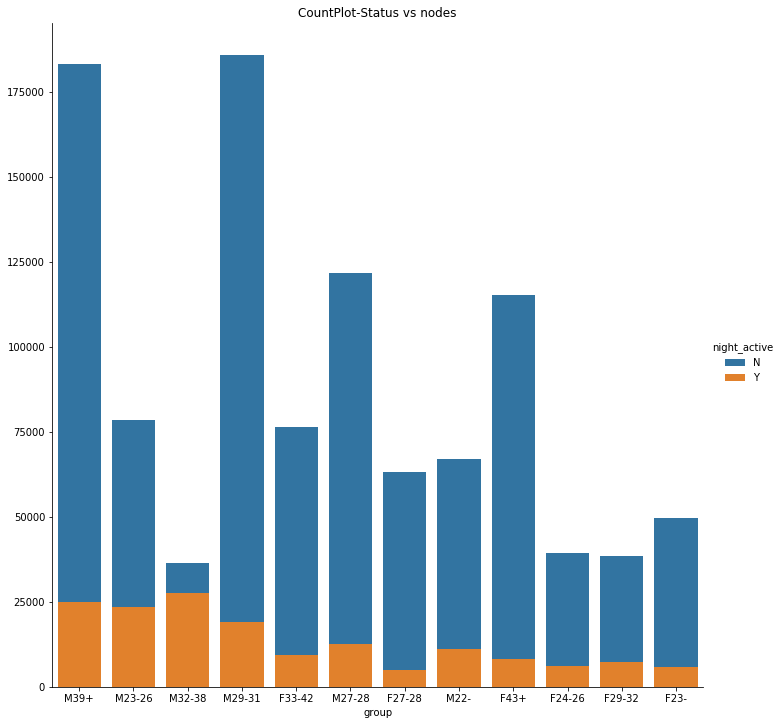

In [ ]:
sns.FacetGrid(events_merged,hue="night_active", size=10,) \
   .map(sns.countplot, "group") \
   .add_legend()  
plt.title("CountPlot-Status vs nodes")

 


<h5>Observation</h5>
<li>M32-38 has significant number of people who spent the phone between 11PM and 3AM.
<li>And comparitively Males use the phone at night more than women.

<h5>Observation</h5>
<li>Data is from 30th April 11.52PM to 8th April 12AM 2016</li>

In [ ]:
import math as m

events_merged=gender_age_train.merge(events, left_on='device_id', right_on='device_id',how='left')
events_merged['Events_Flag'] = ["N" if m.isnan(x) else "Y" for x in events_merged['event_id']] 


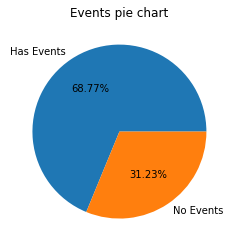

In [ ]:
events_merged=events_merged.groupby(["device_id","Events_Flag"])["device_id"].count().reset_index(name="count")

count=events_merged['Events_Flag'].value_counts()
label=['Has Events','No Events']
plt.pie(count, labels = label,autopct='%1.2f%%')
plt.title("Events pie chart")
plt.show()

<h5>Observation:</h5>
<li>Majority(68.77%) of Train data has events</li>

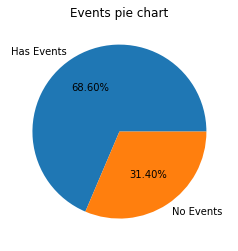

In [ ]:
import math as m

events_merged_test=events.merge(gender_age_test, left_on='device_id', right_on='device_id',how='right')
events_merged_test['Events_Flag'] = ["N" if m.isnan(x) else "Y" for x in events_merged_test['event_id']] 

events_merged_test=events_merged_test.groupby(["device_id","Events_Flag"])["device_id"].count().reset_index(name="count")

count=events_merged_test['Events_Flag'].value_counts()
label=['Has Events','No Events']
plt.pie(count, labels = label,autopct='%1.2f%%')
plt.title("Events pie chart")

plt.show()



<h5>Observation:</h5>
<li>Majority(68.60%) of Test data has events</li>

In [ ]:
events_merged

,device_id,Events_Flag,count
0,-9223067244542181226,N,1
1,-9222956879900151005,Y,65
2,-9222754701995937853,N,1
3,-9222352239947207574,N,1
4,-9222173362545970626,N,1
...,...,...,...
74640,9220914901466458680,Y,44
74641,9221152396628736959,N,1
74642,9221608286127666096,N,1
74643,9221843411551060582,N,1


In [ ]:
events_merged=gender_age_train.merge(events, left_on='device_id', right_on='device_id',how='left')


In [ ]:
#events_merged['device_id'].value_counts()
df_age=events_merged.groupby(["device_id","group"])["device_id"].count().reset_index(name="count")
df_age.head()


,device_id,group,count
0,-9223067244542181226,M23-26,1
1,-9222956879900151005,M32-38,65
2,-9222754701995937853,M29-31,1
3,-9222352239947207574,M23-26,1
4,-9222173362545970626,F43+,1


In [ ]:
#events_merged['device_id'].value_counts()
df_gender=events_merged.groupby(["device_id","gender"])["device_id"].count().reset_index(name="count")
df_gender.head()

,device_id,gender,count
0,-9223067244542181226,M,1
1,-9222956879900151005,M,65
2,-9222754701995937853,M,1
3,-9222352239947207574,M,1
4,-9222173362545970626,F,1


<h5>Observations:</h5>
<li>Assuming more the count of events means more the user is using the device.But from above two cells we can say that there is no relationship between age and gender of user and the amount of time user is using the device. </li>

In [ ]:
df_long=events["longitude"].value_counts()
df_long.head()

0.00      968711
1.00       76362
104.00     27977
116.39     14751
116.33      6721
Name: longitude, dtype: int64

In [ ]:
events['longitude'].describe()


count    3.252950e+06
mean     7.796192e+01
std      5.405801e+01
min     -1.800000e+02
25%      0.000000e+00
50%      1.129500e+02
75%      1.172100e+02
max      1.747600e+02
Name: longitude, dtype: float64

In [ ]:
df_lat=events["latitude"].value_counts()
df_lat.head()

0.00     968955
1.00      76375
30.00     28466
39.91     19289
34.74      6964
Name: latitude, dtype: int64

In [ ]:
events['latitude'].describe()


count    3.252950e+06
mean     2.162949e+01
std      1.569697e+01
min     -3.843000e+01
25%      0.000000e+00
50%      2.802000e+01
75%      3.407000e+01
max      5.994000e+01
Name: latitude, dtype: float64

In [ ]:
df_long_dev=events_merged.groupby(["longitude","latitude"])["device_id"].count().reset_index(name="count")
df_long_dev

,longitude,latitude,count
0,-180.00,0.00,144
1,-155.99,19.82,26
2,-122.32,47.64,1
3,-101.76,38.28,84
4,-101.76,44.85,7
...,...,...,...
32916,134.30,48.36,24
32917,134.30,48.37,1
32918,139.43,35.62,1
32919,139.56,35.62,1


<h5>Observations:</h5>
<li>25% of both longitude and latitude is at 0</li>
<li>other 75% is distributed</li>

In [ ]:
app_data=app_labels.merge(label_categories, left_on='label_id', right_on='label_id',how='inner')

app_data

,app_id,label_id,category
0,7324884708820027918,251,Finance
1,-4494216993218550286,251,Finance
2,8756705988821000489,251,Finance
3,1061207043315821111,251,Finance
4,-1491198667294647703,251,Finance
...,...,...,...
459938,-5364349117796323466,985,Word games
459939,6320161160475087425,985,Word games
459940,7641656572760613661,985,Word games
459941,-2037260970074339790,985,Word games


In [ ]:
label_categories['category'].value_counts()[0:15]

unknown                   26
Insurance                  3
Financial Information      3
music                      3
the film                   3
Pay                        3
health                     3
Lottery ticket             3
Science and Technology     3
Hotels                     2
Sports                     2
Simple                     2
service                    2
free                       2
Crowdfunding               2
Name: category, dtype: int64

label:  Industry tag  Percentage:  12.37  %
label:  Custom label  Percentage:  11.73  %
label:  Tencent  Percentage:  10.72  %
label:  game  Percentage:  10.59  %
label:  Property Industry 2.0  Percentage:  9.94  %
label:  1 free  Percentage:  4.15  %
label:  Services 1  Percentage:  2.57  %
label:  Property Industry new  Percentage:  2.16  %
label:  Relatives 1  Percentage:  1.96  %
label:  Irritation / Fun 1  Percentage:  1.92  %
label:  Cards RPG  Percentage:  1.6  %
label:  Casual puzzle categories  Percentage:  1.53  %
label:  Personal Effectiveness 1  Percentage:  1.28  %
label:  ARPG  Percentage:  1.15  %
label:  Chess categories  Percentage:  1.12  %


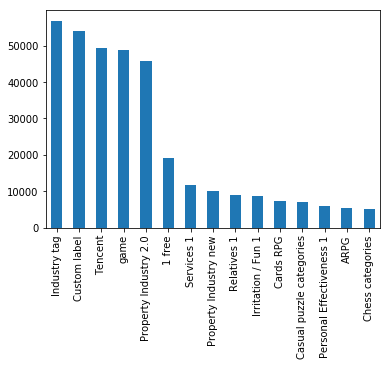

In [ ]:
app_data['category'].value_counts()[0:15].plot.bar()
cat_counts=dict(app_data['category'].value_counts())
cat_keys = [k for k in sorted(cat_counts, key=cat_counts.get, reverse=True)]
#Taking Top 15 keys with highest values 
cat_top_keys=cat_keys[:15]
cat_top_values=[cat_counts.get(k) for k in cat_top_keys]
counts=np.array(cat_top_values)
percent=(counts/app_data.shape[0])*100
for i in range(len(cat_top_keys)):
    print("label: ",cat_top_keys[i]," Percentage: ",np.round(percent[i],2)," %")

<h5>Observation:</h5>
<li>Top 5 labels consist of 55.35% market,out of which 3 are from gaming industry,hence we can say that gaming industry is leading the chinese market</li>

In [ ]:
app_labels[ app_labels['app_id']==9222542043353102991 ]

,app_id,label_id
43007,9222542043353102991,714
86013,9222542043353102991,704
117692,9222542043353102991,548


In [ ]:
app_dup=app_data.groupby(["app_id"])["app_id"].count().reset_index(name="count")
app_dup

,app_id,count
0,-9223281467940916832,4
1,-9222877069545393219,1
2,-9222785464897897681,4
3,-9222198347540756780,4
4,-9221970424041518544,7
...,...,...
113206,9222488106573038706,1
113207,9222542043353102991,3
113208,9222821882765325814,4
113209,9223029189880985324,1


In [ ]:

app_event_dup=app_events.groupby(["event_id"])["event_id"].count().reset_index(name="count")
app_event_dup

,event_id,count
0,2,19
1,6,38
2,7,40
3,9,35
4,16,31
...,...,...
1488091,3252935,14
1488092,3252936,3
1488093,3252937,19
1488094,3252946,69


In [ ]:
app_events['is_active'].value_counts()


0    19740071
1    12732996
Name: is_active, dtype: int64

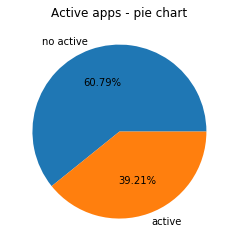

In [ ]:
app_events.head()
count=app_events['is_active'].value_counts()
label=['no active','active']
plt.pie(count, labels = label,autopct='%1.2f%%')
plt.title("Active apps - pie chart")
plt.show()

<h5>Observation</h5>
<li>From above 7 cells we can say that,In each event user has used multiple apps,and these apps belong to multiple categories.</li>
<li>Here all registered apps are installed but 39.21% are actively used.</li>


<h3>Phone brand,device analysis</h3>

In [ ]:
phone_dup=phone_data.groupby(["device_id"])["device_id"].count().reset_index(name="count")
phone_dup[ phone_dup["count"]>1 ]

,device_id,count
227,-9198513807097378193,2
274,-9194249084574705214,2
422,-9180330522697778980,2
1815,-9042966463857944795,2
2509,-8977849817626954804,2
...,...,...
185829,9134757794671046563,2
186177,9169567266060728256,2
186264,9178224089698771087,2
186429,9196371203514832504,2


In [ ]:
phone_dup=phone_data.groupby(["device_id","phone_brand","device_model"])["device_id"].count().reset_index(name="count")
phone_dup[ phone_dup["count"]>1 ]

,device_id,phone_brand,device_model,count
227,-9198513807097378193,酷派,F2,2
274,-9194249084574705214,vivo,Y29L,2
422,-9180330522697778980,华为,荣耀6 Plus,2
1815,-9042966463857944795,小米,红米1S,2
2509,-8977849817626954804,华为,荣耀4A,2
...,...,...,...,...
185835,9134757794671046563,三星,Galaxy S4,2
186183,9169567266060728256,奇酷,青春版,2
186270,9178224089698771087,联想,A590,2
186435,9196371203514832504,OPPO,R7 Plus,2


In [ ]:
phone_data[ phone_data["device_id"]==9134757794671046563 ]

,device_id,phone_brand,device_model
104783,9134757794671046563,三星,Galaxy S4
151796,9134757794671046563,三星,Galaxy S4


<h5>Observations</h5>
<li>Duplicates are present in phone data</li>

In [ ]:
english_phone_brands_mapping = {
    "三星": "samsung",
    "天语": "Ktouch",
    "海信": "hisense",
    "联想": "lenovo",
    "欧比": "obi",
    "爱派尔": "ipair",
    "努比亚": "nubia",
    "优米": "youmi",
    "朵唯": "dowe",
    "黑米": "heymi",
    "锤子": "hammer",
    "酷比魔方": "koobee",
    "美图": "meitu",
    "尼比鲁": "nibilu",
    "一加": "oneplus",
    "优购": "yougo",
    "诺基亚": "nokia",
    "糖葫芦": "candy",
    "中国移动": "ccmc",
    "语信": "yuxin",
    "基伍": "kiwu",
    "青橙": "greeno",
    "华硕": "asus",
    "夏新": "panosonic",
    "维图": "weitu",
    "艾优尼": "aiyouni",
    "摩托罗拉": "moto",
    "乡米": "xiangmi",
    "米奇": "micky",
    "大可乐": "bigcola",
    "沃普丰": "wpf",
    "神舟": "hasse",
    "摩乐": "mole",
    "飞秒": "fs",
    "米歌": "mige",
    "富可视": "fks",
    "德赛": "desci",
    "梦米": "mengmi",
    "乐视": "lshi",
    "小杨树": "smallt",
    "纽曼": "newman",
    "邦华": "banghua",
    "E派": "epai",
    "易派": "epai",
    "普耐尔": "pner",
    "欧新": "ouxin",
    "西米": "ximi",
    "海尔": "haier",
    "波导": "bodao",
    "糯米": "nuomi",
    "唯米": "weimi",
    "酷珀": "kupo",
    "谷歌": "google",
    "昂达": "ada",
    "聆韵": "lingyun",
    "小米": "Xiaomi",
    "华为": "Huawei",
    "魅族": "Meizu",
    "中兴": "ZTE",
    "酷派": "Coolpad",
    "金立": "Gionee",
    "SUGAR": "SUGAR",
    "OPPO": "OPPO",
    "vivo": "vivo",
    "HTC": "HTC",
    "LG": "LG",
    "ZUK": "ZUK",
    "TCL": "TCL",
    "LOGO": "LOGO",
    "SUGAR": "SUGAR",
    "Lovme": "Lovme",
    "PPTV": "PPTV",
    "ZOYE": "ZOYE",
    "MIL": "MIL",
    "索尼" : "Sony",
    "欧博信" : "Opssom",
    "奇酷" : "Qiku",
    "酷比" : "CUBE",
    "康佳" : "Konka",
    "亿通" : "Yitong",
    "金星数码" : "JXD",
    "至尊宝" : "Monkey King",
    "百立丰" : "Hundred Li Feng",
    "贝尔丰" : "Bifer",
    "百加" : "Bacardi",
    "诺亚信" : "Noain",
    "广信" : "Kingsun",
    "世纪天元" : "Ctyon",
    "青葱" : "Cong",
    "果米" : "Taobao",
    "斐讯" : "Phicomm",
    "长虹" : "Changhong",
    "欧奇" : "Oukimobile",
    "先锋" : "XFPLAY",
    "台电" : "Teclast",
    "大Q" : "Daq",
    "蓝魔" : "Ramos",
    "奥克斯" : "AUX"
}

In [ ]:


# # Translating the Chinese Terms in both columns to English
phone_data['phone_brand'] = phone_data['phone_brand'].apply(lambda x: english_phone_brands_mapping[x] if x in english_phone_brands_mapping else x)

In [ ]:
phone_data.head()


,device_id,phone_brand,device_model
0,-8890648629457979026,Xiaomi,红米
1,1277779817574759137,Xiaomi,MI 2
2,5137427614288105724,samsung,Galaxy S4
3,3669464369358936369,SUGAR,时尚手机
4,-5019277647504317457,samsung,Galaxy Note 2


In [ ]:
brand_counts=dict(phone_data['phone_brand'].value_counts())
brand_keys = [k for k in sorted(brand_counts, key=brand_counts.get, reverse=True)]
#Taking Top 15 keys with highest values 
brand_top_keys=brand_keys[:15]
brand_top_values=[brand_counts.get(k) for k in brand_top_keys]

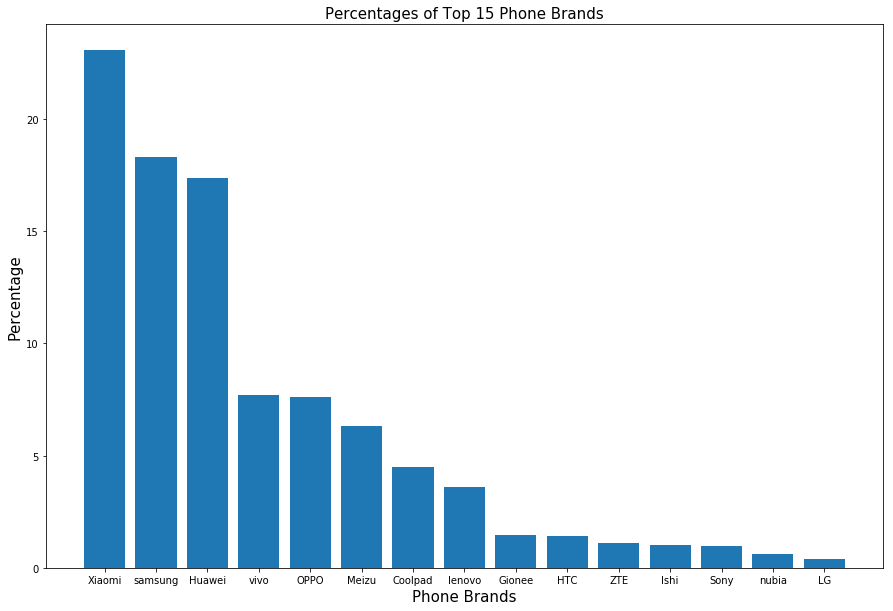

------------------------------------------------------------------------------------------
Brand:  Xiaomi  Percentage:  23.08  %
Brand:  samsung  Percentage:  18.31  %
Brand:  Huawei  Percentage:  17.39  %
Brand:  vivo  Percentage:  7.69  %
Brand:  OPPO  Percentage:  7.63  %
Brand:  Meizu  Percentage:  6.33  %
Brand:  Coolpad  Percentage:  4.49  %
Brand:  lenovo  Percentage:  3.61  %
Brand:  Gionee  Percentage:  1.48  %
Brand:  HTC  Percentage:  1.43  %
Brand:  ZTE  Percentage:  1.12  %
Brand:  lshi  Percentage:  1.03  %
Brand:  Sony  Percentage:  0.97  %
Brand:  nubia  Percentage:  0.61  %
Brand:  LG  Percentage:  0.41  %


In [ ]:
plt.figure(figsize=(15,10))
indices=np.arange(len(brand_top_keys))
counts=np.array(brand_top_values)
percent=(counts/phone_data.shape[0])*100
plt.bar(indices,percent)
plt.xlabel('Phone Brands',fontsize=15)
plt.ylabel('Percentage',fontsize=15)
plt.title('Percentages of Top 15 Phone Brands',fontsize=15)
plt.xticks(indices,brand_top_keys)
plt.show()
print("-"*90)
for i in range(len(brand_top_keys)):
    print("Brand: ",brand_top_keys[i]," Percentage: ",np.round(percent[i],2)," %")

In [ ]:
phone_device_data=gender_age_train.merge(phone_data, left_on='device_id', right_on='device_id',how='inner')
phone_device_data

,device_id,gender,age,group,phone_brand,device_model
0,-8076087639492063270,M,35,M32-38,Xiaomi,MI 2
1,-2897161552818060146,M,35,M32-38,Xiaomi,MI 2
2,-8260683887967679142,M,35,M32-38,Xiaomi,MI 2
3,-4938849341048082022,M,30,M29-31,Xiaomi,红米note
4,245133531816851882,M,30,M29-31,Xiaomi,MI 3
...,...,...,...,...,...,...
74834,4682031842235089751,M,30,M29-31,Xiaomi,MI 3
74835,-9178703742877135986,M,30,M29-31,Xiaomi,MI 3
74836,180946546684162312,M,20,M22-,Xiaomi,红米note
74837,1390702386071991851,M,37,M32-38,Huawei,Ascend P8


Text(0.5, 1.0, 'CountPlot-Status vs nodes')

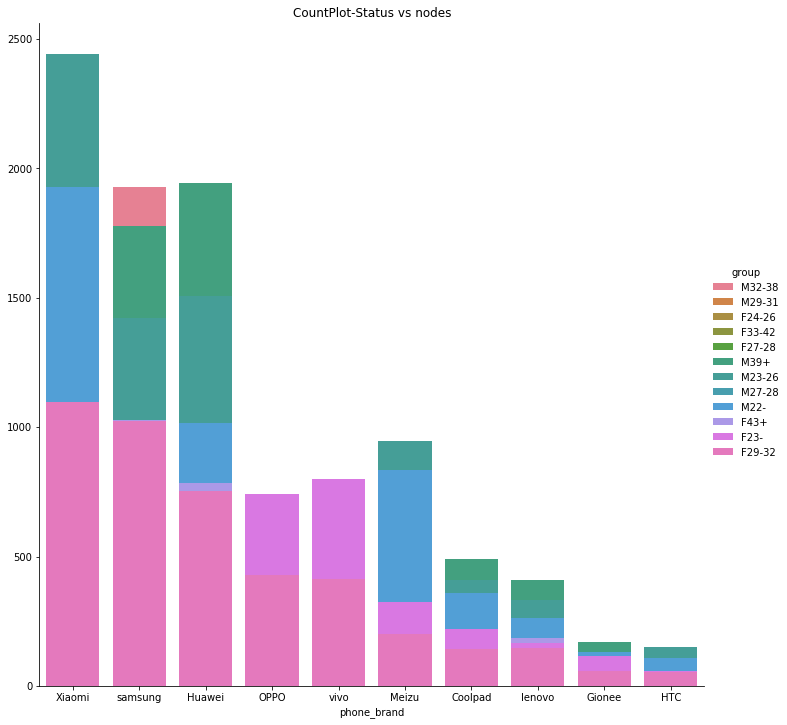

In [ ]:
sns.FacetGrid(phone_device_data,hue="group", size=10,) \
   .map(sns.countplot, "phone_brand",order=phone_device_data.phone_brand.value_counts().iloc[:10].index) \
   .add_legend()  
plt.title("CountPlot-Status vs nodes")

 


Text(0.5, 1.0, 'CountPlot-Status vs nodes')

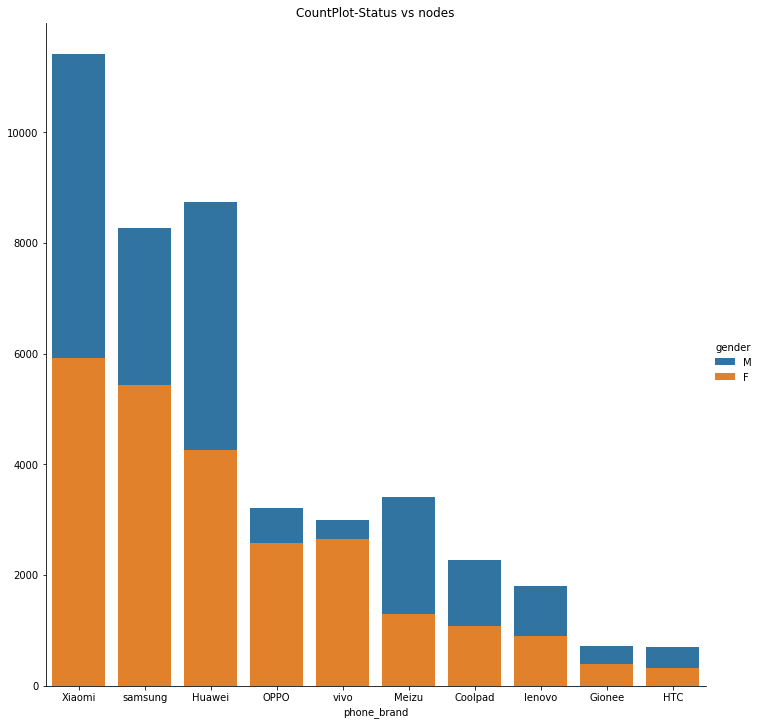

In [ ]:
sns.FacetGrid(phone_device_data,hue="gender", size=10,) \
   .map(sns.countplot, "phone_brand",order=phone_device_data.phone_brand.value_counts().iloc[:10].index) \
   .add_legend()  
plt.title("CountPlot-Status vs nodes")

 


<h5>Observation:</h5>
    <li>Top phone brands used are Xiaomi,samsung,huawei.
    <li>Top 3 brands consist of 58.78% of phones and hence they are dominating the mobile industry.
    <li>Other brands consist of 41.22% of phones.
     <li>We can also see that there is no linear/not linear relation of group vs phone_brand,but since its the only data available for devices without events,These will be used for classification,but most of the sales of oppo and vivo are from females which can be due its phone filters.
    

<h3>Summary:</h3>



<li>There are totally 12 groups,where male users are more than female users</li>
<li>Male age range -> 22-39+</li>
<li>Female age range -> 23-43+</li>
<li>Age wise we have more data in females and count wise male data is more.</li>
<li>25 and 75 Percentile Age values for Both Male and Female are similar</li>
<li>MAD is same for both Male and female</li>
<li>Even though the count of male is higher than female ,the distribution of data in both is similar.</li>
<li>Majority(68.77%) of Train data has events</li>
<li>Majority(68.80%) of Test data has events</li>
<li>Data is from 30th April 11.52PM to 8th May 12AM 2016</li>
<li>M32-38 has significant number of people who spent the phone between 11PM and 3AM.
<li>And comparitively Males use the phone at night more than women.
<li>Assuming more the count of events means more the user is using the device.But from above two cells we can say that there is no relationship between age and gender of user and the amount of time user is using the device. </li>
<li>In each event user has used multiple apps,and these apps belong to multiple categories.</li>
<li>Here all registered apps are installed but 39.21% are actively used(Train).</li>
<li>Duplicates are present in phone data which need to be removed</li>
<li>Phone data is the only the data present for devices without events.</li>
<li>Top 3 brands consist of 58.78% of phones and hence they are dominating the mobile industry.</li>




<h3>Insight:</h3>


<li>Around 32% data has no events for which only phone brand and model are considered as features.</li>
<li>For data with events(68%),features below are decided to be used for the further process.</li>  

<h3>Features decided after EDA</h3>


<li>mode/median of longitude(of all events and timestamps)</li>
<li>mode/median of latitude(of all events and timestamps)</li>
<li>TFIDF approach of apps used(active) by that particular device</li>
<li>BOW approach of labels of apps used(installed) by that particular device</li>
<li>BOW approach of phone brand(one hot encoding,since these consist of different languages)</li>
<li>BOW approach of phone model(one hot encoding,since these consist of different languages)</li>
<li>BOW weekday the event has occured(one hot encoded)</li>
<li>BOW Hour of the Event</li>
<li>BOW Hour bin of the Event</li>
  
